In [4]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
tp=10.0**(-3)
pos1=[0.0,0.0]
pos2=[0.0,1.0]
v1=[1.0,0.0]
v2=[-1.0,0.0]
lx1=[0]
lx2=[0]
ly1=[0]
ly2=[1]
def acc(x1,y1,x2,y2):
    accx=-np.power((np.power(10.0,1)*(x1-x2)/(np.power(x1-x2,2)+np.power(y1-y2,2))),3/2)
    accy=-np.power((np.power(10.0,1)*(y1-y2)/(np.power(x1-x2,2)+np.power(y1-y2,2))),3/2)
    l=[accx,accy]
    return l
v1[0]=v1[0]+acc(pos1[0],pos1[1],pos2[0],pos2[1])[0]*tp/2
v1[1]=v1[1]+acc(pos1[0],pos1[1],pos2[0],pos2[1])[1]*tp/2
v2[0]=v2[0]-acc(pos1[0],pos1[1],pos2[0],pos2[1])[0]*tp/2
v2[1]=v2[1]-acc(pos1[0],pos1[1],pos2[0],pos2[1])[1]*tp/2

for i in range(1,10001):
    lx1.append(pos1[0])
    lx2.append(pos2[0])
    ly1.append(pos1[1])
    ly2.append(pos2[1])

    pos1[0]=pos1[0]+v1[0]*tp
    pos1[1]=pos1[1]+v1[1]*tp
    pos2[0]=pos2[0]+v2[0]*tp
    pos2[1]=pos2[1]+v2[1]*tp
    v1[0]=v1[0]+acc(pos1[0],pos1[1],pos2[0],pos2[1])[0]*tp
    v1[1]=v1[1]+acc(pos1[0],pos1[1],pos2[0],pos2[1])[1]*tp
    v2[0]=v2[0]-acc(pos1[0],pos1[1],pos2[0],pos2[1])[0]*tp
    v2[1]=v2[1]-acc(pos1[0],pos1[1],pos2[0],pos2[1])[1]*tp

     

    


<IPython.core.display.Javascript object>


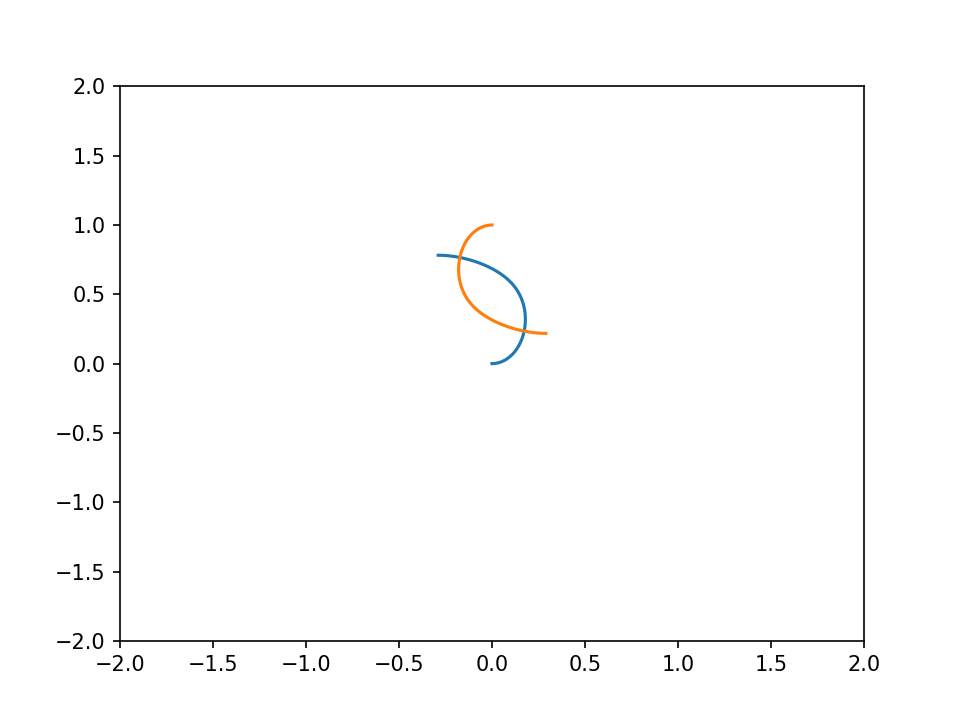

In [5]:
fig,ax=plt.subplots()
ax.set_xlim(-2.0,2.0)
ax.set_ylim(-2.0,2.0)
line1,=ax.plot(0,0)
line2,=ax.plot(0,1)
def anime(i):
    line1.set_xdata(lx1[:i])
    line1.set_ydata(ly1[:i])
    line2.set_xdata(lx2[:i])
    line2.set_ydata(ly2[:i])
    return line1,line2,
function=FuncAnimation(fig,func=anime,frames=10000,interval=1,repeat=False)
plt.show()       